In [1]:
from astropy.time import Time
from astroplan import download_IERS_A 
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
import astroplan
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones
import pyorbital





pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline

In [2]:
download_IERS_A()

In [3]:
hydraA=FixedTarget.from_name("Hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)                                #Checking if correct values were loaded



<FixedTarget "Hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


In [4]:
ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", timezone = 'Australia/Sydney')
print(kmtnet)


location_meerkat = EarthLocation.from_geodetic(21.44407*u.deg,-30.71369*u.deg,1050*u.m)
meerkat= Observer(location=location_meerkat, name="MeerKaT", timezone='Africa/Johannesburg')
print(meerkat)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)

<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='Siding Spring Observatory',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='MeerKaT',
    location (lon, lat, el)=(21.44407 deg, -30.71369000000001 deg, 1049.999999999732 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>


In [5]:
#Time Range

start_obs = Time('2020-11-12 01:00:00')
end_obs= Time('2020-11-13 19:00:00')
delta_t = end_obs - start_obs
observe_time2 = start_obs + delta_t*np.linspace(0, 1,75)

In [6]:

hydraA2=FixedTarget.from_name("Hydra_A", name='HydraA @CTIO')  
hydraA3=FixedTarget.from_name("Hydra_A", name='HydraA @KMTNET')
hydraA4=FixedTarget.from_name("Hydra_A", name='HydraA @MEERKAT')
hydraA5=FixedTarget.from_name("Hydra_A", name='HydraA @ASKAP')

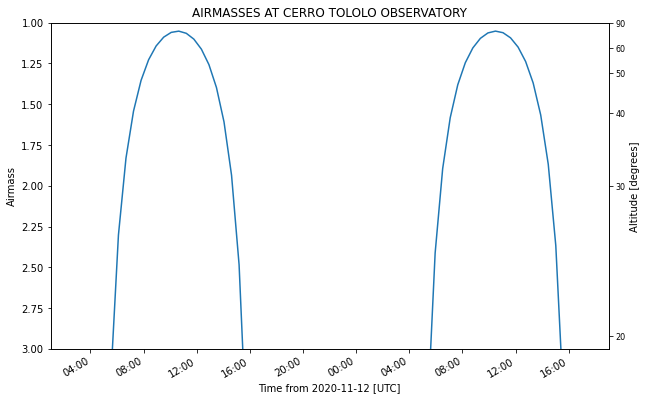

In [7]:

plt.figure(figsize=(10,6))  #Plotting Airmasses and Elevations RA and DEC of Hydra A for a given date 2020-11-11

plot_airmass(hydraA, ctio, observe_time2, brightness_shading=True,altitude_yaxis=True)

#_has_twin(plt.axvline(x=moonset_kmtnet,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9))


plt.title('AIRMASSES AT CERRO TOLOLO OBSERVATORY',fontsize=12)
plt.xlabel('TIMES',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [8]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
#from collections import Sequence
import operator
def plot_airmass3(targets, observer, time, ax=None, style_kwargs=None,
                 style_sheet=None, brightness_shading=False,
                 altitude_yaxis=False, min_airmass=1.0, min_region=None,
                 max_airmass=3.0, max_region=None):
    r"""
    Plots airmass as a function of time for a given target.

    If a `~matplotlib.axes.Axes` object already exists, an additional
    airmass plot will be "stacked" on it.  Otherwise, creates a new
    `~matplotlib.axes.Axes` object and plots airmass on top of that.

    When a scalar `~astropy.time.Time` object is passed in (e.g.,
    ``Time('2000-1-1')``), the resulting plot will use a 24-hour window
    centered on the time indicated, with airmass sampled at regular
    intervals throughout.
    However, the user can control the exact number and frequency of airmass
    calculations used by passing in a non-scalar `~astropy.time.Time`
    object. For instance, ``Time(['2000-1-1 23:00:00', '2000-1-1
    23:30:00'])`` will result in a plot with only two airmass measurements.

    For examples with plots, visit the documentation of
    :ref:`plots_time_dependent`.

    Parameters
    ----------
    targets : list of `~astroplan.FixedTarget` objects
        The celestial bodies of interest.
        If a single object is passed it will be converted to a list.

    observer : `~astroplan.Observer`
        The person, telescope, observatory, etc. doing the observing.

    time : `~astropy.time.Time`
        If scalar (e.g., ``Time('2000-1-1')``), will result in plotting target
        airmasses once an hour over a 24-hour window.
        If non-scalar (e.g., ``Time(['2000-1-1'])``, ``[Time('2000-1-1')]``,
        ``Time(['2000-1-1', '2000-1-2'])``),
        will result in plotting data at the exact times specified.

    ax : `~matplotlib.axes.Axes` or None, optional.
        The `~matplotlib.axes.Axes` object to be drawn on.
        If None, uses the current ``Axes``.

    style_kwargs : dict or None, optional.
        A dictionary of keywords passed into `~matplotlib.pyplot.plot_date`
        to set plotting styles.

    style_sheet : dict or `None` (optional)
        matplotlib style sheet to use. To see available style sheets in
        astroplan, print *astroplan.plots.available_style_sheets*. Defaults
        to the light theme.

    brightness_shading : bool
        Shade background of plot to scale roughly with sky brightness. Dark
        shading signifies times when the sun is below the horizon. Default
        is `False`.

    altitude_yaxis : bool
        Add alternative y-axis on the right side of the figure with target
        altitude. Default is `False`.

    min_airmass : float
        Lower limit of y-axis airmass range in the plot. Default is ``1.0``.

    max_airmass : float
        Upper limit of y-axis airmass range in the plot. Default is ``3.0``.

    min_region : float
        If set, defines an interval between ``min_airmass`` and ``min_region``
        that will be shaded. Default is `None`.

    max_region : float
        If set, defines an interval between ``max_airmass`` and ``max_region``
        that will be shaded. Default is `None`.

    Returns
    -------
    ax : `~matplotlib.axes.Axes`
        An ``Axes`` object with added airmass vs. time plot.

    Notes
    -----
    y-axis is inverted and shows airmasses between 1.0 and 3.0 by default.
    If user wishes to change these, use ``ax.<set attribute>`` before drawing
    or saving plot:

    """
    # Import matplotlib, set style sheet
    if style_sheet is not None:
        _set_mpl_style_sheet(style_sheet)

    import matplotlib.pyplot as plt
    from matplotlib import dates

    # Set up plot axes and style if needed.
    if ax is None:
        ax = plt.gca()
    if style_kwargs is None:
        style_kwargs = {}
    style_kwargs = dict(style_kwargs)
    style_kwargs.setdefault('linestyle', '-')
    style_kwargs.setdefault('linewidth', 1.5)
    style_kwargs.setdefault('fmt', '-')

    # Populate time window if needed.
    time = Time(time)
    if time.isscalar:
        time = time + np.linspace(-12, 12, 100)*u.hour
    elif len(time) == 1:
        warnings.warn('You used a Time array of length 1.  You probably meant '
                      'to use a scalar. (Or maybe a list with length > 1?).',
                      PlotWarning)

    if not isinstance(targets, Sequence):
        targets = [targets]

    for target in targets:
        # Calculate airmass
        airmass = observer.altaz(time, target).secz
        # Mask out nonsense airmasses
        masked_airmass = np.ma.array(airmass, mask=airmass < 1)

        # Some checks & info for labels.
        try:
            target_name = target.name
        except AttributeError:
            target_name = ''

        # Plot data
        ax.plot_date(time.plot_date, masked_airmass, label=target_name, **style_kwargs)
        
    # Format the time axis
    ax.set_xlim([time[0].plot_date, time[-1].plot_date])
    date_formatter = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_formatter)
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # Shade background during night time
    if brightness_shading:
        start = time[0].datetime

        # Calculate and order twilights and set plotting alpha for each
        twilights = [
            (observer.sun_set_time(Time(start), which='next').datetime, 0.0),
            (observer.twilight_evening_civil(Time(start), which='next').datetime, 0.1),
            (observer.twilight_evening_nautical(Time(start), which='next').datetime, 0.2),
            (observer.twilight_evening_astronomical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_astronomical(Time(start), which='next').datetime, 0.4),
            (observer.twilight_morning_nautical(Time(start), which='next').datetime, 0.3),
            (observer.twilight_morning_civil(Time(start), which='next').datetime, 0.2),
            (observer.sun_rise_time(Time(start), which='next').datetime, 0.1),
        ]

        twilights.sort(key=operator.itemgetter(0))
        for i, twi in enumerate(twilights[1:], 1):
            ax.axvspan(twilights[i - 1][0], twilights[i][0],
                       ymin=0, ymax=1, color='grey', alpha=twi[1])

    # Invert y-axis and set limits.
    y_lim = ax.get_ylim()
    if y_lim[1] > y_lim[0]:
        ax.invert_yaxis()
    ax.set_ylim([max_airmass, min_airmass])
    ax.axhline(2,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
    # Draw lo/hi limit regions, if present
    ymax, ymin = ax.get_ylim()       # should be (hi_limit, lo_limit)

    if max_region is not None:
        ax.axhspan(ymax, max_region, facecolor='#F9EB4E', alpha=0.10)
    if min_region is not None:
        ax.axhspan(min_region, ymin, facecolor='#F9EB4E', alpha=0.10)

    # Set labels.
    ax.set_ylabel("Airmass")
    ax.set_xlabel("Time from {0} [UTC]".format(min(time).datetime.date()))

    if altitude_yaxis and not _has_twin(ax):
        altitude_ticks = np.array([90, 60, 50, 40, 30, 20])
        airmass_ticks = 1./np.cos(np.radians(90 - altitude_ticks))

        ax2 = ax.twinx()
        
        ax2.invert_yaxis()
        ax2.set_yticks(airmass_ticks)
        ax2.set_yticklabels(altitude_ticks)
        ax2.set_ylim(ax.get_ylim())
        ax2.set_ylabel('Altitude [degrees]')

    # Redraw figure for interactive sessions.
    ax.figure.canvas.draw()

    # Output.
    return ax

In [9]:

start_obs = Time('2020-11-19 01:00:00')
end_obs= Time('2020-11-20 19:00:00')
delta_t = end_obs - start_obs
observe_time1 = start_obs + delta_t*np.linspace(0, 1,75)

numdays = 30
base=datetime.datetime(2020, 11, 19, 10, 21, 50, 413445)
base = datetime.datetime.today()
date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]
date_list

In [10]:
from astral import moon
""" moon.phase() Calculates the phase of the moon on the specified date.

    Args:
        date: The date to calculate the phase for. Dates are always in the UTC timezone.
              If not specified then today's date is used.

    Returns:
        A number designating the phase.

        ============  ==============
        0 .. 6.99     New moon
        7 .. 13.99    First quarter
        14 .. 20.99   Full moon
        21 .. 27.99   Last quarter
        ============  ==============
    """


" moon.phase() Calculates the phase of the moon on the specified date.\n\n    Args:\n        date: The date to calculate the phase for. Dates are always in the UTC timezone.\n              If not specified then today's date is used.\n\n    Returns:\n        A number designating the phase.\n\n        ============  ==============\n        0 .. 6.99     New moon\n        7 .. 13.99    First quarter\n        14 .. 20.99   Full moon\n        21 .. 27.99   Last quarter\n        ============  ==============\n    "

In [11]:
#moon.phase(datetime.datetime(2020, 10, 31, 10, 17, 14, 724034))

In [12]:
import datetime
start_date = datetime.date(2020, 11, 19)
end_date   = datetime.date(2021, 1, 30)

dates = [ start_date + datetime.timedelta(n) for n in range(int ((end_date - start_date).days))]\


In [13]:
#dates

In [14]:

moonphases=[]
for i in dates:
    moonphases.append(moon.phase(i))

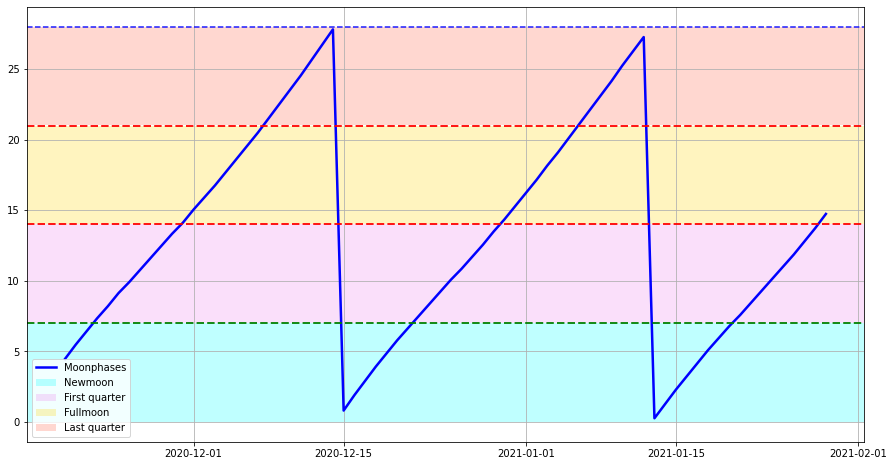

In [15]:
plt.figure(figsize=(15,8))
ax = plt.gca()
plt.plot(dates,moonphases,linewidth=2.5,color='b',label='Moonphases')
ax.axhline(y=6.99,color='g',linestyle='--',linewidth=2,alpha=0.9)
ax.axhline(y = 14, color = 'r', linestyle = '--',linewidth=2,alpha=0.9) 
ax.axhline(y= 20.99, color = 'r', linestyle = '--',linewidth=2,alpha=0.9) 
ax.axhline(y = 27.99, color = 'b', linestyle = '--',alpha=0.9)

#fills
ax.axhspan(0, 6.99, facecolor='cyan', alpha=0.25,label='Newmoon')
ax.axhspan(7, 13.99, facecolor='violet', alpha=0.25,label='First quarter')
ax.axhspan(14, 20.99, facecolor='gold', alpha=0.25,label='Fullmoon')
ax.axhspan(21, 27.99, facecolor='tomato', alpha=0.25,label='Last quarter')
ax.grid()
plt.legend(loc=3,facecolor="w")

NameError: name 'Sequence' is not defined

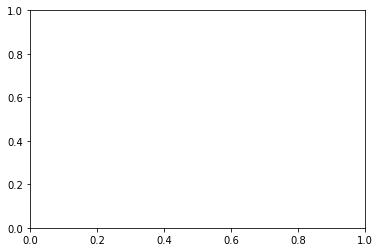

In [16]:
ctio_styles = {'linestyle': '-', 'color': 'k', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
ctio_styles2 = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 0.4 } #lINES STYLES 
plot_airmass3(hydraA, ctio, observe_time2, brightness_shading=True, style_kwargs=ctio_styles)
ax = plt.gca()

#ax.axhline(x=2,color='purple',linestyle='-',linewidth=2.3, label='Moonset',alpha=0.9)
plt.legend()

NameError: name 'Sequence' is not defined

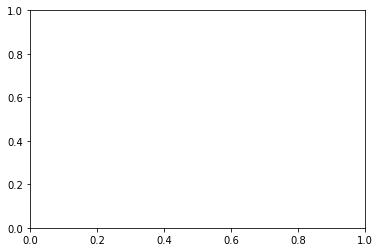

In [17]:
plot_airmass3(hydraA, ctio, observe_time1, brightness_shading=True, style_kwargs=ctio_styles)

In [244]:
table

target name,ever observable,always observable,fraction of time observable
str15,bool,bool,float64
HydraA @CTIO,True,False,0.13333333333333333
HydraA @KMTNET,True,False,0.13333333333333333
HydraA @MEERKAT,True,False,0.13333333333333333
HydraA @ASKAP,True,False,0.13333333333333333


In [51]:
def compute_constraint(self, times, observer, targets):
        # removed the location argument here, which causes small <1 deg
        # innacuracies, but it is needed until astropy PR #5897 is released
        # which should be astropy 1.3.2
        moon = get_moon(times,
                        ephemeris=self.ephemeris)
        # note to future editors - the order matters here
        # moon.separation(targets) is NOT the same as targets.separation(moon)
        # the former calculates the separation in the frame of the moon coord
        # which is GCRS, and that is what we want.
        moon_separation = moon.separation(targets)

        if self.min is None and self.max is not None:
            mask = self.max >= moon_separation
        elif self.max is None and self.min is not None:
            mask = self.min <= moon_separation
        elif self.min is not None and self.max is not None:
            mask = ((self.min <= moon_separation) &
                    (moon_separation <= self.max))
        else:
            raise ValueError("No max and/or min specified in "
                             "MoonSeparationConstraint.")
        return mask

In [60]:
compute_constraint2(self,observe_time2,ctio,hydraA)

NameError: name 'self' is not defined

In [52]:
from astroplan import MoonSeparationConstraint

In [55]:
MoonSeparationConstraint?

In [64]:
from astropy.coordinates import get_moon

In [154]:
moon = get_moon(observe_time2)
#moon

In [95]:
from pytz import timezone
from astroplan.plots import plot_sky


In [150]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import numpy as np
import astropy.units as u
from astropy.time import Time
import warnings

from astroplan.exceptions import PlotBelowHorizonWarning
from astroplan.utils import _set_mpl_style_sheet



def positions(target, observer, time, ax=None, style_kwargs=None,
             north_to_east_ccw=True, grid=True, az_label_offset=0.0*u.deg,
             warn_below_horizon=False, style_sheet=None):
    
    # Turn scalar Time objects into arrays.
    time = Time(time)
    if time.isscalar:
        time = Time([time])
        

   # Grab altitude and azimuth from Astroplan objects.
    # Note that values must be made dimensionless before plotting.
    # Modifying altitude is easier than inverting r-axis.
    altitude = (91 * u.deg - observer.altaz(time, target).alt) * (1/u.deg)
    # Azimuth MUST be given to plot() in radians.
    azimuth = observer.altaz(time, target).az * (1/u.deg) * (np.pi/180.0)

    # Some checks & info for labels.
    if not hasattr(target, 'name'):
        target_name = ''
    else:
        target_name = target.name
    #style_kwargs.setdefault('label', target_name)

    # We only want to plot positions above the horizon.
    az_plot = None
    for alt in range(0, len(altitude)):
        if altitude[alt] > 91.0:
            if warn_below_horizon:
                msg = 'Target "{0}" is below the horizon at time: {1}'
                msg = msg.format(target_name if target_name else 'Unknown Name',
                                 time[alt])
                warnings.warn(msg, PlotBelowHorizonWarning)
        else:
            if az_plot is None:
                az_plot = np.array([azimuth[alt]])
            else:
                az_plot = np.append(az_plot, azimuth[alt])
    alt_plot = altitude[altitude <= 91.0]
    if az_plot is None:
        az_plot = [] 
    
                                                             
    return az_plot

In [151]:
ha=positions(hydraA,ctio,observe_time2)

In [156]:
 def compute_constraint(self, times, observer, targets):
        # removed the location argument here, which causes small <1 deg
        # innacuracies, but it is needed until astropy PR #5897 is released
        # which should be astropy 1.3.2
        moon = get_moon(times,
                        ephemeris=self.ephemeris)
        # note to future editors - the order matters here
        # moon.separation(targets) is NOT the same as targets.separation(moon)
        # the former calculates the separation in the frame of the moon coord
        # which is GCRS, and that is what we want.
        moon_separation = moon.separation(targets)

        if self.min is None and self.max is not None:
            mask = self.max >= moon_separation
        elif self.max is None and self.min is not None:
            mask = self.min <= moon_separation
        elif self.min is not None and self.max is not None:
            mask = ((self.min <= moon_separation) &
                    (moon_separation <= self.max))
        else:
            raise ValueError("No max and/or min specified in "
                             "MoonSeparationConstraint.")
        return mask

In [157]:
compute_constraint(hydraA2,observe_time2,ctio,hydraA)

AttributeError: 'FixedTarget' object has no attribute 'ephemeris'